<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_Netflix_Titles_Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Feature Engineering + EDA

In [2]:
# Info umum dataset
print("Informasi Dataset:")
df.info()

# Cek jumlah data null
print("\nJumlah nilai NULL per kolom:")
print(df.isnull().sum())

# Cek data unik
print("\nJumlah nilai unik per kolom:")
print(df.nunique())

# Mengisi missing value
df['country'] = df['country'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['director'] = df['director'].fillna("Unknown")
df['rating'] = df['rating'].fillna("Unknown")
df['date_added'] = df['date_added'].fillna("Unknown")
df['duration'] = df['duration'].fillna("Unknown")

# Feature Engineering: Menambahkan kolom 'year_added' dan 'month_added'
df['date_added'] = df['date_added'].astype(str)
df['year_added'] = df['date_added'].apply(lambda x: x.strip().split()[-1] if x != 'Unknown' else 'Unknown')
df['month_added'] = df['date_added'].apply(lambda x: x.strip().split()[0] if x != 'Unknown' else 'Unknown')

# Feature Engineering: Menambahkan kolom 'main_country'
df['main_country'] = df['country'].apply(lambda x: x.split(',')[0])

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Jumlah nilai NULL per kolom:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration      

Visualisasi Data

<ipython-input-3-bafede9ce73b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


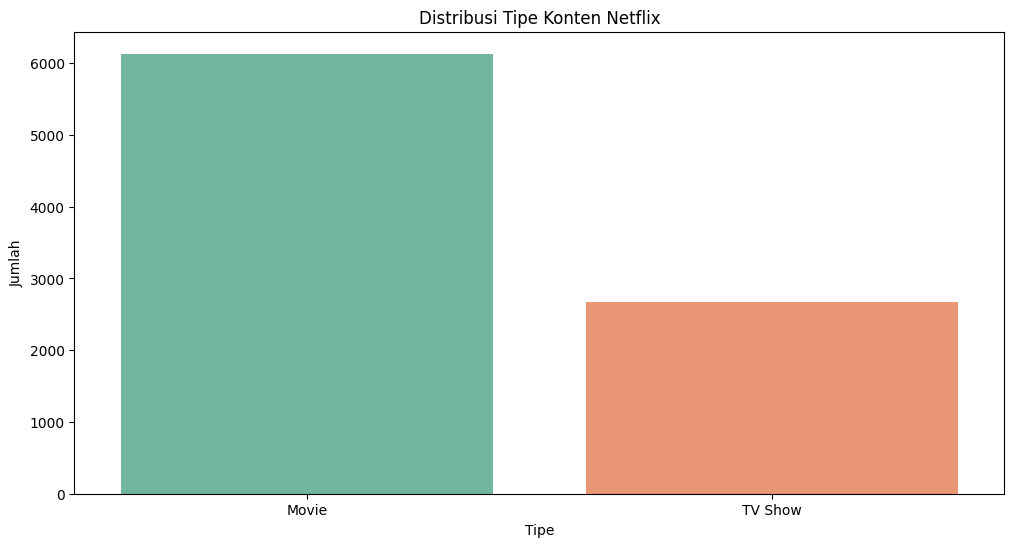

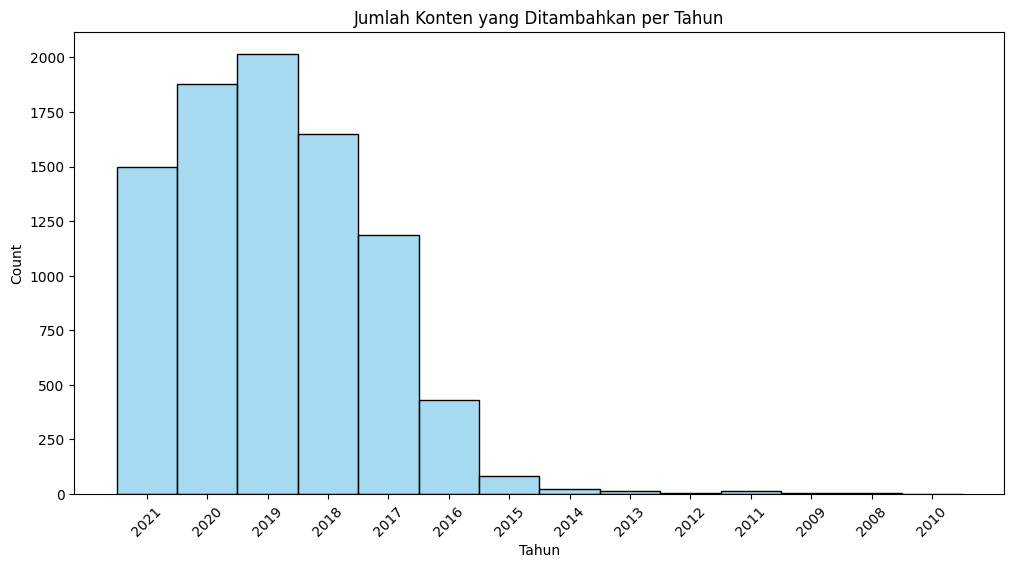

<ipython-input-3-bafede9ce73b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='coolwarm')


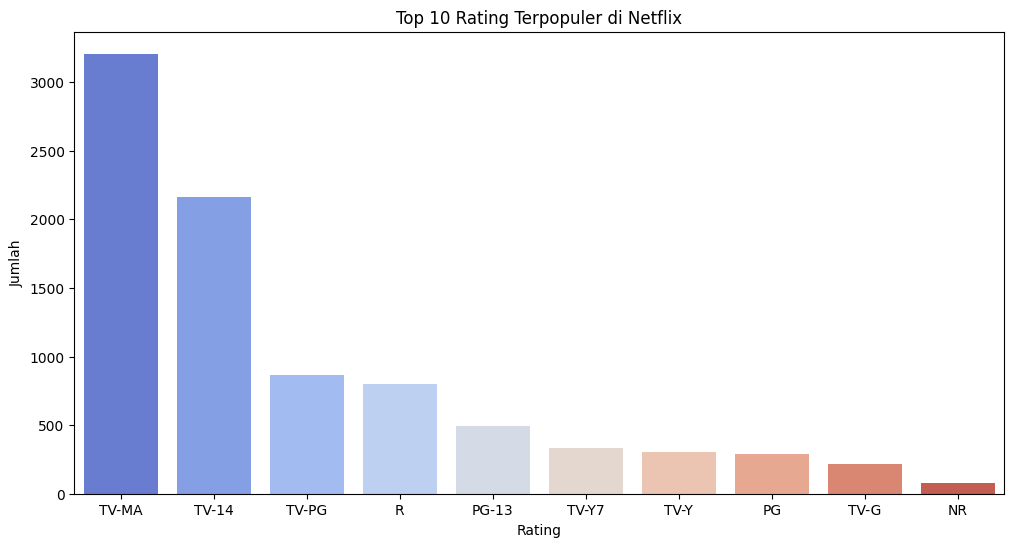

<ipython-input-3-bafede9ce73b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')


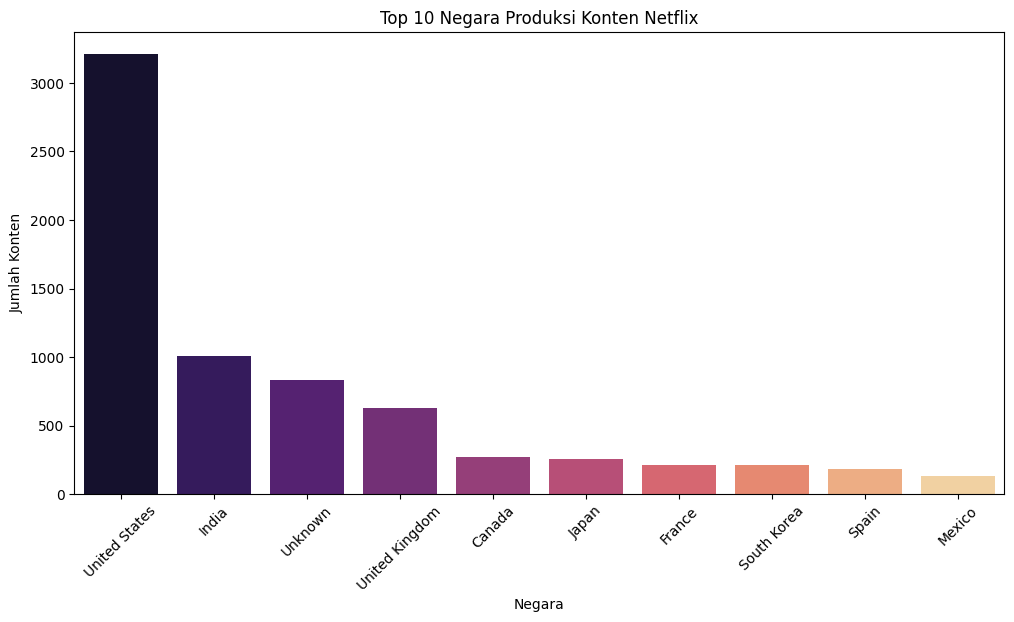

In [3]:
# Ukuran plot default
plt.rcParams['figure.figsize'] = (12,6)

# Visualisasi distribusi jenis konten (Movie vs TV Show)
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribusi Tipe Konten Netflix')
plt.xlabel('Tipe')
plt.ylabel('Jumlah')
plt.show()

# Tahun penambahan konten
sns.histplot(data=df[df['year_added'] != 'Unknown'], x='year_added', bins=20, color='skyblue')
plt.title('Jumlah Konten yang Ditambahkan per Tahun')
plt.xlabel('Tahun')
plt.xticks(rotation=45)
plt.show()

# Rating yang paling umum
top_ratings = df['rating'].value_counts().head(10)
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='coolwarm')
plt.title('Top 10 Rating Terpopuler di Netflix')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

# Negara utama penghasil konten
top_countries = df['main_country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='magma')
plt.title('Top 10 Negara Produksi Konten Netflix')
plt.xlabel('Negara')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.show()

Feature Engineering - Tambahan

In [4]:
# Fitur 1: is_movie (1 jika Movie, 0 jika TV Show)
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# Fitur 2: num_cast (jumlah aktor di kolom 'cast')
df['num_cast'] = df['cast'].apply(lambda x: len(x.split(',')) if x != 'Unknown' else 0)

# Fitur 3: duration_int dan duration_type
df['duration_int'] = df['duration'].str.extract('(\d+)').astype('float')  # ambil angka
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')          # ambil jenis waktu (minutes / Seasons)

# Fitur 4: num_genres (jumlah genre per baris)
df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))

# Fitur 5: release_vs_add_year (selisih antara tahun rilis dan tahun ditambahkan ke Netflix)
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')  # konversi ke numerik
df['release_vs_add_year'] = df['year_added'] - df['release_year']

# Cek hasil 5 fitur baru
df[['title', 'type', 'is_movie', 'num_cast', 'duration_int', 'duration_type', 'num_genres', 'release_vs_add_year']].head()

,title,type,is_movie,num_cast,duration_int,duration_type,num_genres,release_vs_add_year
0,Dick Johnson Is Dead,Movie,1,0,90.0,min,1,1.0
1,Blood & Water,TV Show,0,19,2.0,Seasons,3,0.0
2,Ganglands,TV Show,0,9,1.0,Season,3,0.0
3,Jailbirds New Orleans,TV Show,0,0,1.0,Season,2,0.0
4,Kota Factory,TV Show,0,8,2.0,Seasons,3,0.0


#Persamaan Matematika
##1. Perhitungan Nilai Kosong (Missing Values)
Kode:

df.isnull().sum()
<br><br>
Penjelasan: Operasi ini digunakan untuk menghitung jumlah data yang kosong (null) pada setiap kolom dalam dataset. Secara matematis, ini menggunakan fungsi indikator untuk mendeteksi apakah suatu nilai kosong (NaN) atau tidak.
<br><br>
Rumus Matematis:

$$
Null_x = \sum_{i=1}^{n} I(x_i = NaN)
$$

Di mana:
- $Null_x$ = jumlah nilai kosong pada kolom $x$
- $n$ = jumlah baris dalam dataset
- $x_i$ = nilai pada baris ke-$i$ di kolom $x$
- $I(\cdot)$ = fungsi indikator, bernilai 1 jika kondisi benar, 0 jika salah
<br><br>

##2. Mengubah Kategori Menjadi Angka (Binarisasi Tipe)
Kode:

df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)
<br><br>
Fitur ini mengonversi tipe konten (Movie atau TV Show) menjadi nilai numerik, yaitu 1 untuk Movie dan 0 untuk TV Show. Proses ini disebut binarisasi kategori.
<br><br>
Rumus Matematis:

$$
ismovie_i =
\left\{
\begin{array}{ll}
1, & \text{jika type}_i \not= \text{"Movie"} \\
0, & \text{jika cast}_i = \text{"Movie"}
\end{array}
\right.
$$

Di mana:
- is_movie$_i$ = nilai binarisasi pada baris ke-$i$
- type$_i$ = nilai kategori "type" pada baris ke-$i$
<br><br>

##3. Menghitung Jumlah Aktor dalam Kolom cast
Kode:

df['num_cast'] = df['cast'].apply(lambda x: len(x.split(',')) if x != 'Unknown' else 0)
<br><br>
Fitur ini menghitung jumlah aktor yang terlibat dalam suatu judul dengan cara memecah string berdasarkan koma. Bila informasi aktor tidak tersedia, nilainya diberi 0.
<br><br>
Rumus Matematis:
$$
ismovie_i =
\left\{
\begin{array}{ll}
\text{jumlah aktor pada cast}_i, & \text{jika cast}_i \not= \text{"Unknown"} \\
0, & \text{jika cast}_i = \text{"Unknown"}
\end{array}
\right.
$$
<br><br>

#4. Menentukan Durasi dalam Angka dan Jenisnya
Kode:

df['duration_int'] = df['duration'].str.extract('(\d+)').astype('float')
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')
<br><br>
Pada kolom duration, kita mengambil angka (misalnya "90" dalam "90 minutes") sebagai duration_int dan jenis waktu (misalnya "minutes" atau "Seasons") sebagai duration_type. Ekstraksi dilakukan dengan regular expression dan hasilnya dapat digunakan sebagai fitur numerik.
<br><br>
Rumus Matematis:

$$
duration_i = (\text{duration_int}_i, \text{duration_type}_i)
$$

Di mana:
- duration_int$_i$ = nilai numerik pada baris ke-$i$
- duration_type$_i$ = jenis durasi (menit atau musim) pada baris ke-$i$
<br><br>

##5. Menghitung Jumlah Genre dalam listed_in
Kode:

df['num_genres'] = df['listed_in'].apply(lambda x: len(x.split(',')))
<br><br>
Fitur ini menghitung jumlah genre yang terdaftar dalam satu judul film atau acara. Sama seperti menghitung jumlah aktor, kita menggunakan split(',') lalu menghitung panjang daftar hasil pecahan.
<br><br>
Rumus Matematis:

$$
\text{num_genres}_i = |\text{listed_in}_i|
$$

Di mana:
- $| \cdot |$ = menyatakan paanjang dari daftar genre (Jumlah elemen hasil split)
<br><br>

##6. Selisih Tahun Rilis dan Tahun Ditambahkan ke Netflix
Kode:

df['release_vs_add_year'] = df['year_added'] - df['release_year']
<br><br>
Fitur ini menunjukkan selisih waktu antara tahun film tersebut dirilis dan tahun ditambahkan ke platform Netflix. Nilai ini bisa positif, nol, atau negatif tergantung kapan film ditambahkan.
<br><br>
Rumus Matematis:

$$
\text{release_vs_add_year}_i = \text{year_added}_i - \text{release_year}_i
$$

Di mana:
- release_year$_i$ = tahun film dirilis
- year_added$_i$ = tahun film ditambahkan ke Netflix
<br><br>

##7. Histogram Durasi
Kode:

sns.histplot(df['duration_int'])
<br><br>
Histogram digunakan untuk menunjukkan distribusi dari fitur duration_int. Histogram membagi rentang nilai durasi ke dalam beberapa interval (bin) dan menghitung jumlah data dalam setiap bin.
<br><br>
Rumus Matematis:

$$
h_j = \sum_{i=1}^{n} I (x_i \in bin_j)
$$

Di mana:
- $h_j$ = jumlah data yang masuk ke bin ke-$j$
- $x_i$ = nilai durasi pada baris ke-$i$
- $bin_j$ = interval ke-$j$ dalam histogram
- $I(\cdot)$ = fungsi indikator